In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import highlight_text
from highlight_text import ax_text,fig_text 
import numpy as np
import matplotlib.lines as lines

In [32]:
df = pd.read_html('https://www.fotmob.com/leagues/47/stats/season/17664/players/_goals_prevented/premier-league-players')[0].drop([0,1],axis=1)
df.loc[0,2] ='Alisson Becker'
df.columns = ['Player','Goals Prevented']
df['Player'] = df['Player'].str.split('Goals',expand=True)[0]

In [37]:
working = df.sort_values('Goals Prevented',ascending=True)

In [ ]:
#4ECDC4

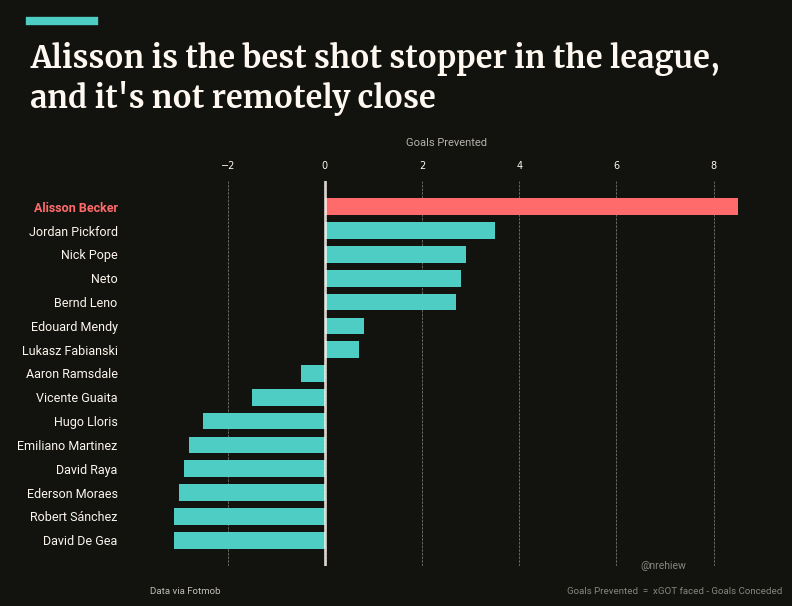

In [129]:
BG_COLOR = '#12130F'
NOTES_COLOR = '#FFF8F0'
TEXTBOX = 'grey' 
FONT = 'Roboto'
TITLE_FONT = 'Merriweather'
BAR_COLOR = '#4ECDC4'
label_fontsize = 9
spaces = '      '
SPECIAL_COLOR = '#FF6B6B'

offset = 0.3

fig,ax = plt.subplots(figsize=(8,5))
fig.set_facecolor(BG_COLOR)

ax.barh(working['Player'] + spaces,working['Goals Prevented'],color=BAR_COLOR, height=0.7,zorder=2)
special_df = working.iloc[-1]
ax.barh(special_df['Player'] + spaces,special_df['Goals Prevented'],color=SPECIAL_COLOR, height=0.7,zorder=2)

for direction in ['right','bottom','top','left']:
    ax.spines[direction].set_visible(False)
#plt.xlabel('Shooting Goals Added / Shot',color = NOTES_COLOR,font=FONT,labelpad=20,zorder =3)
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=True) 


fig.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
# ax.spines['left'].set_color(NOTES_COLOR)
# ax.spines['top'].set_color(NOTES_COLOR)
old = ax.get_ylim()
ax.plot((0,0),old,color = NOTES_COLOR,linewidth=2,zorder=3,alpha=0.8)
ax.tick_params(axis='y', colors=NOTES_COLOR,which='both', labelsize = 10)
ax.tick_params(axis='x', colors=NOTES_COLOR,which='both', labelsize = 7)
ax.xaxis.tick_top()
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False) 
ax.grid(zorder=0,axis='x',color=NOTES_COLOR,linewidth=0.5,linestyle='--',alpha=0.5)
plt.yticks(font= FONT,fontsize = label_fontsize)
fig.text(-0.045,1.2,' ')
ax.get_yticklabels()[-1].set_fontweight('bold')
ax.get_yticklabels()[-1].set_color(SPECIAL_COLOR)
ax.set_ylim(old)

fig.text(0.5,0.95,'Goals Prevented',color= NOTES_COLOR,ha='center',font=FONT,fontsize = 8,alpha=0.7)
fig.text(0.92,0.05,'Goals Prevented  =  xGOT faced - Goals Conceded',
    color = NOTES_COLOR,font=FONT,fontsize=7,zorder =3,va='bottom',alpha =0.5,ha='right')
fig.text(0.13,0.05,'Data via Fotmob',color = NOTES_COLOR,font=FONT,fontsize=7,zorder =3,va='bottom',alpha =0.75)
_ = fig.add_artist(lines.Line2D([-0.02,0.06],[1.2],linewidth=6,color=BAR_COLOR))

fig.text(0.8,0.1,'@nrehiew',color = NOTES_COLOR,font=FONT,fontsize=7.5,zorder =3,va='bottom',alpha =0.5,ha='right')
fig.text(-0.02,1.01,"Alisson is the best shot stopper in the league,\nand it's not remotely close ",color = NOTES_COLOR,
font=TITLE_FONT,fontsize=22,zorder =3,va='bottom',fontweight ='bold')
plt.savefig('/Users/weihern/Documents/Sports Analytics/Visualisations/Workings/Completed/xSGAperShot.jpg',dpi=300,bbox_inches='tight')

In [267]:
query = '''
SELECT 
players.player,
TeamId,
Period,
Minute,
Second,
data.MatchId,
X,
Y,
PassEndX,
PassEndY,
Type,
OutcomeType,
isShot,
GoalMouthY,
GoalMouthZ,
ARRAY(
  SELECT event_lookup.Event
  FROM UNNEST(data.SatisfiedEventsTypes) as eventsId
  JOIN `<DATASET>.Lookup_Tables.Event_Types` as event_lookup
  ON eventsId = event_lookup.id
) as Events,
FROM <DATASET> as data
LEFT JOIN 
  `<DATASET> .Lookup_Tables.Players` as players ON data.PlayerId = players.id
WHERE 
isShot 
AND MatchId IN (SELECT DISTINCT MatchId FROM `<DATASET> .Event_Data.EPL_2023` WHERE TeamId = 26 )
AND 
TeamId != 26
'''

df = pd.read_gbq(query,project_id='<DATASET> ',dialect='standard')

In [254]:
df = df[df['X'] > 50]

In [259]:
df[df['Qualifiers'].apply(lambda x:'StandingSave'in x)].drop('Qualifiers',axis=1).drop_duplicates()

,player,TeamId,Period,Minute,Second,MatchId,X,Y,PassEndX,PassEndY,Type,OutcomeType,isShot,GoalMouthY,GoalMouthZ
0,Granit Xhaka,13,2,61,27,1640764,89.9,69.5,NaN,NaN,MissedShots,True,True,54.6,69.4
1,Gabriel Jesus,13,1,27,31,1640764,95.2,69.7,NaN,NaN,SavedShot,True,True,54.4,0.6
2,Bukayo Saka,13,2,72,19,1640764,90.4,40.0,NaN,NaN,SavedShot,True,True,48.4,1.3
3,Gabriel Jesus,13,2,72,20,1640764,94.0,47.8,NaN,NaN,SavedShot,True,True,50.0,1.9
4,Martin Ødegaard,13,2,49,7,1640764,84.8,54.8,NaN,NaN,SavedShot,True,True,50.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Kieffer Moore,183,2,67,22,1640709,77.8,57.5,NaN,NaN,SavedShot,True,True,53.0,19.0
139,Leandro Trossard,211,1,12,25,1640760,87.3,47.2,NaN,NaN,SavedShot,True,True,50.5,3.8
143,Leandro Trossard,211,1,3,48,1640760,90.4,57.5,NaN,NaN,Goal,True,True,45.8,0.6
144,Leandro Trossard,211,1,17,0,1640760,92.5,64.8,NaN,NaN,Goal,True,True,49.1,15.8


In [261]:
np.unique(np.concatenate(df['Events'].values))

array(['bigChanceCreated', 'bigChanceMissed', 'bigChanceScored',
       'closeMissHigh', 'closeMissHighLeft', 'closeMissHighRight',
       'closeMissLeft', 'closeMissRight', 'goalCounter', 'goalHead',
       'goalLeftFoot', 'goalNormal', 'goalOpenPlay', 'goalOwn',
       'goalPenaltyArea', 'goalRightFoot', 'goalSetPiece',
       'goalSixYardBox', 'keyPassOther', 'keyPassShort', 'passKey',
       'penaltyMissed', 'penaltyScored', 'shotBlocked', 'shotCounter',
       'shotHead', 'shotLeftFoot', 'shotOboxTotal', 'shotObp',
       'shotOffTarget', 'shotOffTargetInsideBox', 'shotOnPost',
       'shotOnTarget', 'shotOpenPlay', 'shotPenaltyArea', 'shotRightFoot',
       'shotSetPiece', 'shotSixYardBox', 'shotsTotal', 'sixYardBlock',
       'touches'], dtype=object)

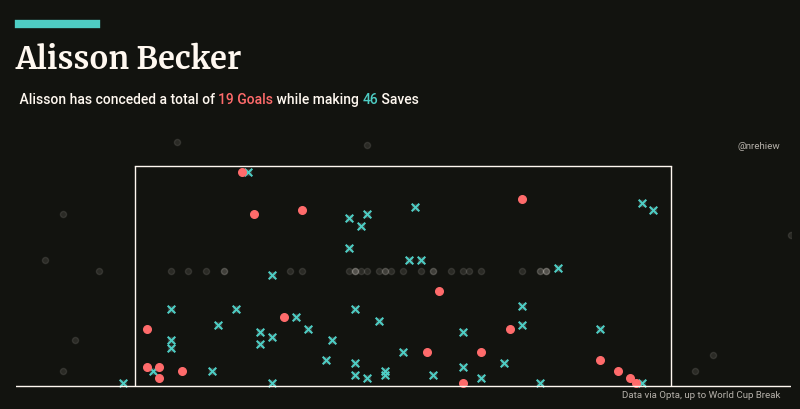

In [289]:
x =(45.2, 54.2)
y = 36.5
x_adjust = [x[1] + 2, x[0] - 2]
x_bins = np.arange(x[0],x[1]+0.1,(x[1]-x[0])/6) #array([44.7 , 46.83, 48.96, 51.09, 53.22])
y_bins = np.arange(0,26+0.1,26/4) #array([ 0. ,  8.66666667, 17.33333333])

TEXTBOX = 'grey' 
SUCCESS_COLOR =  SPECIAL_COLOR
FAIL_COLOR = BAR_COLOR
#NOTES_COLOR = 'black'
NOTES_COLOR = '#FFF8F0'
fig,ax = plt.subplots(figsize=(10,4))
ax.set_xlim(x_adjust)
ax.set_ylim((-1,80))
ax.vlines(x,0,y,linewidth =1,color =NOTES_COLOR)
ax.plot(x_adjust,[0,0],linewidth = 1,color =NOTES_COLOR)
ax.plot(x,[y,y],linewidth = 1,color =NOTES_COLOR)


df['X_bin'] = pd.cut(df['GoalMouthY'],x_bins,labels = False)
df['Y_bin'] = pd.cut(df['GoalMouthZ'],y_bins,labels = False)
grouped = df.groupby(['X_bin','Y_bin']).size().reset_index().rename(columns={0:'count'}).fillna(0)
arr = np.empty((len(y_bins)-1,len(x_bins)-1),dtype='float')
x_increment = (x[1]-x[0])/12
y_increment = 26/8
# for i in range(len(x_bins)-1):
#     for j in range(len(y_bins)-1):
#         val = grouped[(grouped['X_bin']==i) & (grouped['Y_bin']==j)]['count'].values
#         if len(val) == 0: 
#             arr[j,i] = 0
#             ax.text(x_bins[i]+x_increment,y_increment+y_bins[j],'0%',color='black',font=FONT,fontsize=9,ha='center',va='center',fontweight = 'demi',bbox = dict(facecolor=TEXTBOX,alpha = 0.2,boxstyle = 'round, rounding_size = 0.2',edgecolor = TEXTBOX,pad = 0.2))
#         else :
#             arr[j,i] = val[0] / len(df)
#             ax.text(x_bins[i]+x_increment,y_increment+y_bins[j],f'{(val[0]/len(df) * 100):.1f}%',color='black',font=FONT,fontsize=9,ha='center',va='center',fontweight = 'demi',bbox = dict(facecolor=TEXTBOX,alpha = 0.2,boxstyle = 'round, rounding_size = 0.2',edgecolor = TEXTBOX,pad = 0.2))

success = df[(df['Type']=='Goal') ]
fail = df[df['Events'].apply(lambda x : 'shotOnTarget' in x)].drop('Events',axis=1).drop_duplicates().drop(success.index.tolist(),errors='ignore')
rest = df.drop('Events',axis=1).drop_duplicates()
ax.scatter(rest['GoalMouthY'],rest['GoalMouthZ'],c=NOTES_COLOR,s=20, marker = 'o',alpha = 0.1)
ax.scatter(fail['GoalMouthY'],fail['GoalMouthZ'],c=FAIL_COLOR,s=30, marker = 'x')
ax.scatter(success['GoalMouthY'],success['GoalMouthZ'],c=SUCCESS_COLOR,s=30)
    

ax.set_xlim(x_adjust)
ax.set_ylim((-1,50))
ax.axis('off')
fig.set_facecolor(BG_COLOR)
saves = len(fail)

fig.text(0.5,1.04,' ')
_ = fig.add_artist(lines.Line2D([0.128,0.205],[1.03],linewidth=6,color=BAR_COLOR))
fig.text(0.125,0.90,'Alisson Becker',font=TITLE_FONT,fontsize=22,zorder =3,va='bottom',fontweight ='bold',color=NOTES_COLOR)
fig_text(0.125,0.86, f''' Alisson has conceded a total of <{len(success)} Goals> while making <{saves}> Saves''',
font=FONT,color = NOTES_COLOR,fontsize = 10,fontweight ='roman',highlight_textprops=[{'color':SUCCESS_COLOR},{'color':FAIL_COLOR}])

fig.text(0.89,0.72,'@nrehiew',ha='right',font = FONT,fontsize = 7, color = NOTES_COLOR,alpha=0.7)
fig.text(0.89,0.098,'Data via Opta, up to World Cup Break',ha='right',font = FONT,fontsize = 7, color = NOTES_COLOR,alpha=0.7)
plt.savefig('/Users/weihern/Documents/Sports Analytics/Visualisations/Workings/Completed/Alisson.jpg',dpi=300,bbox_inches='tight')


In [173]:
df = pd.read_csv('/Users/weihern/Documents/Sports Analytics/Data/Transfermarket/net_spend.csv').drop('Unnamed: 0',axis=1)

In [171]:
league_df = df.T.iloc[:-1]

In [175]:
league_df = df.groupby('League').sum(numeric_only=True)
league_df.columns = ['18/19', '19/20', '20/21', '21/22','22/23','Total']
league_df = league_df.T.iloc[:-1]

Text(0.9, 0, 'Leagues included: Bundesliga, Eredivisie, LaLiga, Liga\nPortugal, Ligue 1, Premier League, Premiership, Serie A')

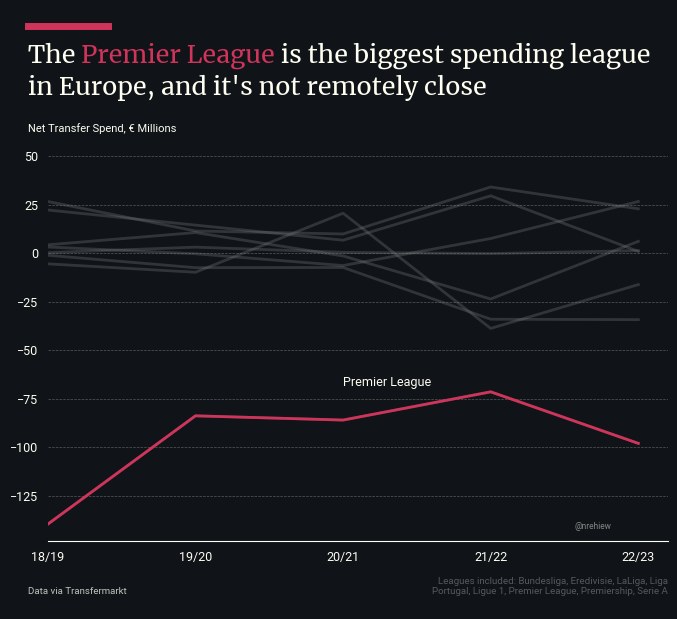

In [159]:
BG_COLOR = '#101419'
NOTES_COLOR = '#FFFFF2'
TEXTBOX = 'grey' 
FONT = 'Roboto'
TITLE_FONT = 'Merriweather'
HIGHLIGHT = '#D1345B'
NORMAL_COLOR = 'gray'
label_fontsize = 9

fig,ax = plt.subplots(figsize=(8,5))
fig.set_facecolor(BG_COLOR)
for league in df['League'].unique():
    ax.plot(league_df.index, league_df[league]/(10**6),label=league,color=NORMAL_COLOR,linewidth=2,alpha=0.3)

ax.plot(league_df.index, league_df['Premier League']/(10**6),label=league,color=HIGHLIGHT,linewidth=2)
ax.text(2,-70,'Premier League',color=NOTES_COLOR,font=FONT,fontsize=9,ha='left',va='bottom')
#ax.annotate('The Premier League',(2,-80),(1,-65),color=NOTES_COLOR,font=FONT,fontsize=6,ha='center',va='bottom', arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=-0.3",color=NOTES_COLOR,linewidth=0.5),zorder=3)
for direction in ['right','top','left']:
    ax.spines[direction].set_visible(False)
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=True) 

ax.set_xlim(0,ax.get_xlim()[1])
ax.set_ylim(ax.get_ylim()[0],50)
fig.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
ax.spines['left'].set_color(NOTES_COLOR)
ax.spines['bottom'].set_color(NOTES_COLOR)
ax.tick_params(axis='y', colors=NOTES_COLOR,which='both', labelsize = 10)
ax.tick_params(axis='x', colors=NOTES_COLOR,which='both', labelsize = 6)
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=True) 
ax.grid(zorder=0,axis='y',color=NOTES_COLOR,linewidth=0.5,linestyle='--',alpha=0.3)
plt.yticks(font= FONT,fontsize = label_fontsize)
plt.xticks(font= FONT,fontsize = label_fontsize)


fig.text(0.7,1.15,' ')
fig.text(0.5,-0.02,' ')
_ = fig.add_artist(lines.Line2D([0.1,0.2],[1.14],linewidth=5,color=HIGHLIGHT))
fig.text(0.83,0.13,'@nrehiew',color = NOTES_COLOR,font=FONT,fontsize=6,zorder =3,va='bottom',alpha =0.5,ha='right')
fig_text(0.1,0.99,"The <Premier League> is the biggest spending league\nin Europe, and it's not remotely close",color = NOTES_COLOR,font=TITLE_FONT,fontsize=18,zorder =3,va='bottom',
highlight_textprops=[{'color':HIGHLIGHT}])
fig.text(0.1,0.925,'Net Transfer Spend, € Millions',color = NOTES_COLOR,font=FONT,fontsize=8,zorder =3,va='bottom')
fig.text(0.1,0,'Data via Transfermarkt',color = NOTES_COLOR,font=FONT,fontsize=7,zorder =3,va='bottom',alpha =0.75)
fig.text(0.9,0,'Leagues included: Bundesliga, Eredivisie, LaLiga, Liga\nPortugal, Ligue 1, Premier League, Premiership, Serie A',color = NOTES_COLOR,font=FONT,fontsize=7,
zorder =3,va='bottom',alpha =0.3,ha='right')
#plt.savefig('/Users/weihern/Documents/Sports Analytics/Visualisations/Workings/Completed/TransferSpend.jpg',dpi=300,bbox_inches='tight')

In [98]:
', '.join(df['League'].unique())

'Bundesliga, Eredivisie, LaLiga, Liga Portugal, Ligue 1, Premier League, Premiership, Serie A'

In [53]:
league_df

,League,22/23,21/22,20/21,19/20,18/19,Total
0,Bundesliga,4236000.0,10556000.0,-1503000.0,-23675000.0,6016000.0,-4156000.0
1,Eredivisie,22181000.0,14385000.0,6613000.0,29492000.0,848000.0,73814000.0
2,LaLiga,-5574000.0,-9905000.0,20509000.0,-38845000.0,-16260000.0,-50320000.0
3,Liga Portugal,26543000.0,11366000.0,9821000.0,34027000.0,22793000.0,104700000.0
4,Ligue 1,3111000.0,-383000.0,-6446000.0,7491000.0,26560000.0,30372000.0
5,Premier League,-139696000.0,-83883000.0,-86067000.0,-71519000.0,-98079000.0,-479231000.0
6,Premiership,195000.0,3032000.0,356000.0,-289000.0,1241000.0,4352000.0
7,Serie A,-1153000.0,-7544000.0,-7443000.0,-34099000.0,-34321000.0,-84559000.0
